In [20]:
# 导入库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 三个模型
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 加载数据
df = pd.read_csv('train.csv')  # 路径请根据实际调整

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].map({
    'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4
}).fillna(0)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Cabin'] = df['Cabin'].fillna('U').str[0].map(
    dict(zip(list('ABCDEFGUT'), range(8)))
).fillna(0)

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Cabin', 'Title']]
X = X.fillna(0)
y = df['Survived']
# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] St

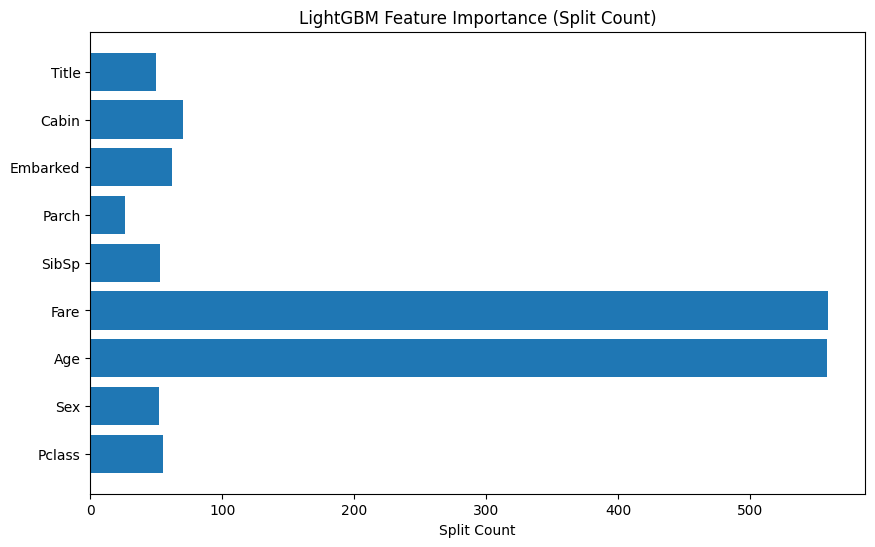

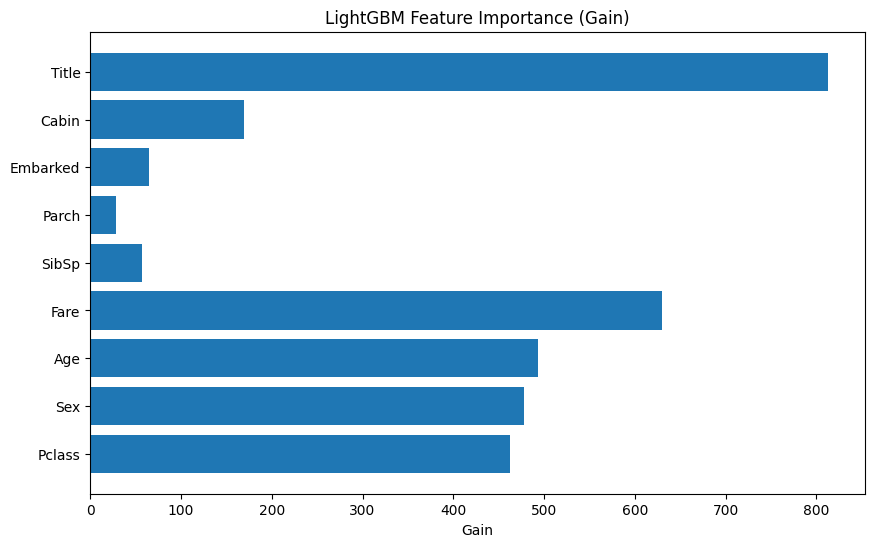

In [21]:
import matplotlib.pyplot as plt

# 确保 fit 过
lgbm.fit(X_train, y_train)

# 1. Split 数
importances = lgbm.feature_importances_
# 2. Gain
importances_gains = lgbm.booster_.feature_importance(importance_type='gain')

feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Split Count')
plt.title('LightGBM Feature Importance (Split Count)')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_gains)
plt.xlabel('Gain')
plt.title('LightGBM Feature Importance (Gain)')
plt.show()

In [22]:
# 用 DataFrame 展示更方便
imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Split': importances,
    'Gain': importances_gains
}).sort_values(by='Gain', ascending=False)

print(imp_df)

    Feature  Split        Gain
8     Title     50  813.214162
3      Fare    559  630.255450
2       Age    558  493.613201
1       Sex     52  477.391974
0    Pclass     55  462.216635
7     Cabin     70  169.422836
6  Embarked     62   64.325532
4     SibSp     53   57.003964
5     Parch     26   28.126031


In [29]:
# 训练 Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest:", accuracy_score(y_test, rf.predict(X_test)))



Random Forest: 0.8156424581005587


In [31]:
# 训练 LGBM
lgbm = LGBMClassifier(min_data_in_leaf=20, min_gain_to_split=0)
lgbm.fit(X_train, y_train)
print("LightGBM:", accuracy_score(y_test, lgbm.predict(X_test)))



[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] St

In [32]:
# 训练 CatBoost
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
print("CatBoost:", accuracy_score(y_test, cat.predict(X_test)))

CatBoost: 0.8268156424581006


In [5]:
print(X_train.describe())

           Pclass         Sex         Age        Fare
count  712.000000  712.000000  712.000000  712.000000
mean     2.330056    0.344101   23.698511   32.586276
std      0.824584    0.475408   17.507272   51.969529
min      1.000000    0.000000    0.000000    0.000000
25%      2.000000    0.000000    5.000000    7.925000
50%      3.000000    0.000000   24.000000   14.454200
75%      3.000000    1.000000   35.000000   30.500000
max      3.000000    1.000000   80.000000  512.329200
